 
# Module 6 - Probability and Distributions

## Exercises

In general, the work should include an explanation. What you provide as output from any code should come with a descriptor. Use LaTeX in the Markdown boxes to describe your functions. See https://jupyterbook.org/en/stable/content/math.html

In general, the output from your code should be descriptive. A number or vector or matrix, with no explanation of what it is, will not get full credit. 

In [3]:
import pandas as pd
import numpy as np

### Exercise 1
**Discrete - marginal and conditional distributions**

**Scenario:**
Suppose you are analyzing the performance of students in a graduate-level statistics course. The students are categorized based on two variables: "Study Hours" and "Exam Outcome." The data is represented in a DataFrame named `student_data` in Python, which includes the following columns:

- `Study_Hours`: The number of hours each student spent studying for the exam (a discrete random variable).
- `Exam_Outcome`: The outcome of the exam, categorized as either 'Pass' or 'Fail' (another discrete random variable).

Your task is to perform various probability calculations using marginal and conditional probabilities to gain insights into the relationship between study hours and exam outcomes.

**Instructions:**

1. Load the necessary libraries and create the data set. Use the one that I created here.


In [62]:
# 1
import pandas as pd
import numpy as np

# Sample data
data = {'Study_Hours': [2, 3, 1, 4, 2, 3, 5, 4, 2, 3,3, 5, 4, 2, 3], #15
        'Exam_Outcome': ['Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass','Fail', 'Pass', 'Fail', 'Pass', 'Fail']}

# Create DataFrame
student_data = pd.DataFrame(data)
print(student_data.iloc[:5])
student_data['Exam_Outcome'].value_counts()
#student_data[student_data['Exam_Outcome']== 'Fail']count()

   Study_Hours Exam_Outcome
0            2         Fail
1            3         Pass
2            1         Fail
3            4         Pass
4            2         Fail


Pass    8
Fail    7
Name: Exam_Outcome, dtype: int64

* a. Calculate the marginal probability of passing the exam (`P(Pass)`) and failing the exam (`P(Fail)`).

* b. Calculate the marginal probability distribution of study hours (`P(Study_Hours)`).

* c. Determine the conditional probability of passing the exam given that a student studied for exactly 3 hours (`P(Pass | Study_Hours = 3)`).

* d. Determine the conditional probability distribution of study hours given that a student passed the exam (`P(Study_Hours | Pass)`).

* e. Visualize the marginal probability distribution of study hours using a bar plot.

* f. Visualize the conditional probability distribution of study hours given that a student passed the exam using a bar plot.

**Note:** Make sure to explain your code using comments and provide interpretations for each probability calculation.


In [152]:
#1a total pass, fail and sum
p_fail,p_pass,p_S= 7,8, student_data['Exam_Outcome'].value_counts().sum()
print(f'marginal probability of passing the exam:{p_pass}/{p_S} or {p_pass/p_S:.4f}') #{:.1f}
print(f'marginal probability of failing the exam:{p_fail}/{p_S} or {p_fail/p_S:.4f}')
print()
#1b
#print(f'marginal probability distribution for :',student_data[student_data['Exam_Outcome']== 'Fail'].count())
#print(f'marginal probability distribution fo:',student_data[student_data['Exam_Outcome']== 'Pass'].count())
study_hours_c= student_data['Study_Hours'].value_counts()
study_hours_p= study_hours_c / len(student_data)
print('marginal probability distribution of study hours:') #probability of each study hour
print(study_hours_p)
print()
#1c
hours_3 = student_data[student_data['Study_Hours'] == 3] #sample space
total_3hours = hours_3.shape[0] #sample space, row 
pass_3hours = hours_3[hours_3['Exam_Outcome'] == 'Pass'].shape[0] #event space
con_prob_3 = pass_3hours/total_3hours #conditional probability of P(p) given 3 hours
print('passed exam given student study for exactly 3 hours')
print(f"P(Pass | Study_Hours = 3) = {con_prob_3:.4f} ({pass_3hours}/{total_3hours})")
print()
#1d
# Filter for students who passed
passed_students = student_data[student_data['Exam_Outcome'] == 'Pass']
# Count study hours for students who passed
passed_study_hrs = passed_students['Study_Hours'].value_counts().sort_index()

# Calculate conditional probability distribution
phrs_given_pass = {}
for hours in sorted(student_data['Study_Hours'].unique()):
    # For study hours that don't appear in passed students, count is 0
    count = passed_study_hrs.get(hours, 0)
    phrs_given_pass[hours] = count / p_pass
    print(f"P(Study_Hours = {hours} | Pass) = {count}/{p_pass} = {count/p_pass:.4f}")

marginal probability of passing the exam:8/15 or 0.5333
marginal probability of failing the exam:7/15 or 0.4667

marginal probability distribution of study hours:
3    0.333333
2    0.266667
4    0.200000
5    0.133333
1    0.066667
Name: Study_Hours, dtype: float64

passed exam given student study for exactly 3 hours
P(Pass | Study_Hours = 3) = 0.6000 (3/5)

P(Study_Hours = 1 | Pass) = 0/8 = 0.0000
P(Study_Hours = 2 | Pass) = 1/8 = 0.1250
P(Study_Hours = 3 | Pass) = 3/8 = 0.3750
P(Study_Hours = 4 | Pass) = 2/8 = 0.2500
P(Study_Hours = 5 | Pass) = 2/8 = 0.2500


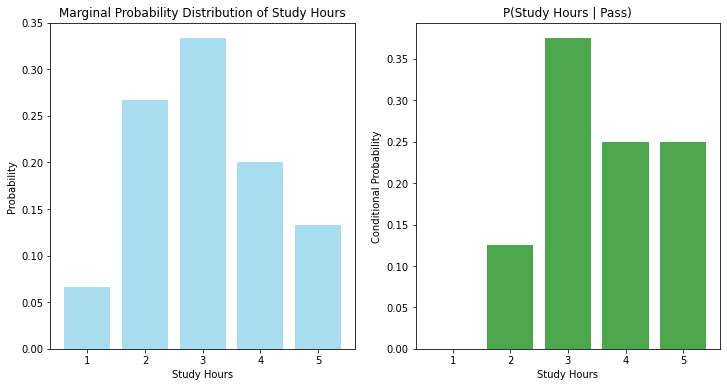

In [153]:
#above conditional distribution does not have an index, index has to be created for the histogram
all_hours = sorted(student_data['Study_Hours'].unique())
conditional_prob = pd.Series(index=all_hours, data=0.0)
for hours in passed_study_hrs.index:
    conditional_prob[hours] = passed_study_hrs[hours] / p_pass

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar(study_hours_p.index, study_hours_p.values, color='skyblue', alpha=0.7)
ax1.set_xlabel('Study Hours')
ax1.set_ylabel('Probability')
ax1.set_title('Marginal Probability Distribution of Study Hours')

ax2.bar(conditional_prob.index, conditional_prob.values, color='green', alpha=0.7)
ax2.set_xlabel('Study Hours')
ax2.set_ylabel('Conditional Probability')
ax2.set_title('P(Study Hours | Pass)');

### Exercise 2

**Using the Law of Large Numbers**

In probability theory, the law of large numbers (LLN) is a mathematical theorem that states that the average of the results obtained from a large number of independent and identical random samples converges to the true value, if it exists. More formally, the LLN states that given a sample of independent and identically distributed values, the sample mean converges to the true mean.

It follows from the law of large numbers that the empirical probability of success in a series of Bernoulli trials will converge to the theoretical probability. For a Bernoulli random variable, the expected value is the theoretical probability of success, and the average of n such variables (assuming they are independent and identically distributed (i.i.d.)) is precisely the relative frequency.

**Solve the following**
A box contains 10 white balls, 20 red balls and 30 green balls. If we take 5 balls from the box with replacement (we take the ball, observe what color it is and put it back into the box). We want to know the probability of:

**A** Take 3 white and 2 red.

**B** Take all of the same color.

* 2.1 Calculate the probabilities of **A** and **B** theoretically and provide your answer in a Markdown box.

* 2.2 Run the experiment 1000 times and calculate the above probabilities. Try again with 10,000 trials.

* 2.3 Explain the results as it relates to the Law of Large Numbers.

**2.1 Provide your theoretical solution here.**

* Sample space is 60 balls in total (10w,20r,30g); 
* 5 balls from the box with replacement, making the probability of each color constant
* for white 10/60 * 3 and for red 20/60 * 2. 

$$ \frac{10}{60} or \frac{1}{6}^3 $$ and for Red $$ \frac{20}{60} or \frac{1}{3}^2$$

using the rule of combintation C(5,3) = $$ \frac{5!}{3!(5-3)!} = 10 $$ $$ 10 * (\frac{1}{6})^3 * (\frac{1}{3})^2 = \frac{10}{1944} or \frac{5}{972} $$

**B.)** Take all the same color

P(5W) = $$  \frac{10}{60} or (\frac{1}{6})^5 = \frac{1}{7776}$$
P(5r) = $$  \frac{20}{60} or (\frac{1}{3})^5 = \frac{1}{243}$$
P(5g) = $$  \frac{30}{60} or (\frac{1}{2})^5 = \frac{1}{32}$$

Total probability of colors all same = P(5W) + P(5r) + P(5g) = $$ \frac{1}{7776} + \frac{1}{243} + \frac{1}{32} = \frac{1}{7776} + \frac{243}{7776} + \frac{32}{7776} = \frac{276}{7776} or \frac{23}{648}$$


In [4]:
#2.2 - create ball box
ball_box = {}

# Create the box of balls
for i in range(60):
    if i < 10:
        ball_box[i] = "White"
    elif (i > 9) and (i < 30):
        ball_box[i] = "Red"
    else:
        ball_box[i] = "Green"

print(ball_box)
            
# 2 - simulation         
def take_balls(n_simulations = 1000):
    count_1 = 0
    count_2 = 0

    for i in range(n_simulations):
        colors = []

        # Take 5 balls from the box
        for i in range(5):
            colors.append(ball_box[np.random.randint(0, 59)])

        # Convert list to Numpy array for better filtering
        colors = np.array(colors)
        
        white_balls = sum(colors == "White")
        red_balls = sum(colors == "Red")
        green_balls = sum(colors == "Green")

        # Decide if we should add it to the count:
        if (white_balls == 3) and (red_balls == 2):
            count_1 += 1
        
        if (white_balls == 5) or (red_balls == 5) or (green_balls == 5):
            count_2 += 1
    
    return count_1 / n_simulations, count_2 / n_simulations

#run the experiment and compute the probabilities                                                                              


{0: 'White', 1: 'White', 2: 'White', 3: 'White', 4: 'White', 5: 'White', 6: 'White', 7: 'White', 8: 'White', 9: 'White', 10: 'Red', 11: 'Red', 12: 'Red', 13: 'Red', 14: 'Red', 15: 'Red', 16: 'Red', 17: 'Red', 18: 'Red', 19: 'Red', 20: 'Red', 21: 'Red', 22: 'Red', 23: 'Red', 24: 'Red', 25: 'Red', 26: 'Red', 27: 'Red', 28: 'Red', 29: 'Red', 30: 'Green', 31: 'Green', 32: 'Green', 33: 'Green', 34: 'Green', 35: 'Green', 36: 'Green', 37: 'Green', 38: 'Green', 39: 'Green', 40: 'Green', 41: 'Green', 42: 'Green', 43: 'Green', 44: 'Green', 45: 'Green', 46: 'Green', 47: 'Green', 48: 'Green', 49: 'Green', 50: 'Green', 51: 'Green', 52: 'Green', 53: 'Green', 54: 'Green', 55: 'Green', 56: 'Green', 57: 'Green', 58: 'Green', 59: 'Green'}


In [14]:
print('probability of 3w and 2r. Probability of all 5 same color; 1000 tries')
take_balls(1000)

probability of 3w and 2r. Probability of all 5 same color; 1000 tries


(0.007, 0.037)

In [16]:
print('probability of 3w and 2r. Probability of all 5 same color; 10000 tries')
take_balls(10000)

probability of 3w and 2r. Probability of all 5 same color; 10000 tries


(0.0059, 0.0368)

In [15]:
print('probability of 3w and 2r. Probability of all 5 same color; 100000 tries')
take_balls(100000)

probability of 3w and 2r. Probability of all 5 same color; 100000 tries


(0.00563, 0.03308)

In [7]:
A = 5/972
print(f'probability of Event A:, {A:.6f}')
B= 23/648
print(f'probability of Event B:, {B:.6f}')

probability of Event A:, 0.005144
probability of Event B:, 0.035494


**2.3 Explanation using LLN**
(LLN) is a mathematical theorem that states that the average of the results obtained from a large number of independent and identical random samples converges to the true value, if it exists:

From the float results of the probability, we can see the value produced by the function (take_balls) is converging closer to the result produced from the theoretical calculations. 1000 tries, 10k then 100k all produced result that converges closer, due to more tries. This states that the true value exists

### Exercise 3: 

**Bayes' Theorem with Continuous Random Variables**

**Scenario:**
Imagine you are working as a data scientist at a pharmaceutical company developing a new drug for a specific medical condition. You are conducting tests to determine the effectiveness of the drug, and two continuous random variables are of interest: "Blood Pressure Change" and "Drug Efficacy."

The data is represented in two separate datasets, `blood_pressure_data` and `efficacy_data`, each containing samples from patients who either took the drug ('Drug') or received a placebo ('Placebo'). Both datasets have two columns: 'Patient_ID' and the respective continuous random variable.

Your task is to use Bayes' Theorem to analyze the probability that a patient who experienced a certain blood pressure change actually took the drug.

**Definitions:**

Let's clarify the definitions of prior probability and posterior probability in the context of the provided example:

1. **Prior Probability (P(Drug) and P(Placebo)):**
   - **Definition:** The prior probability represents our initial belief or probability assigned to an event before incorporating new evidence. In this context, `P(Drug)` is the probability that a patient is on the drug, and `P(Placebo)` is the probability that a patient received a placebo. These probabilities are based on historical data, clinical trials, or any relevant information before observing the patient's blood pressure change.

   - **In the Example:** `P(Drug)` is the probability that a randomly selected patient took the drug, and `P(Placebo)` is the probability that a randomly selected patient received a placebo. These probabilities are calculated based on the number of patients in the 'Drug' and 'Placebo' groups.

2. **Posterior Probability (P(Drug | Blood Pressure Change)):**
   - **Definition:** The posterior probability is the updated probability of an event after considering new evidence. In the context of Bayes' Theorem, it is the probability of the hypothesis given the observed data.

   - **In the Example:** `P(Drug | Blood Pressure Change)` is the probability that a patient took the drug given a specific blood pressure change. This is calculated using Bayes' Theorem, taking into account the prior probability, the likelihood of observing the blood pressure change given the drug or placebo, and the normalization factor. It represents our updated belief about the likelihood of the patient being on the drug after observing their blood pressure change.

In summary, the prior probability reflects our initial belief, and the posterior probability is the updated belief incorporating new evidence. In the example, we are updating our belief about a patient being on the drug based on their observed blood pressure change.

**Instructions:**

1. Load the necessary libraries and import the datasets.


In [12]:
# 3
import pandas as pd
import numpy as np

# Sample data
np.random.seed(42)  # for reproducibility

# Blood Pressure Change data
blood_pressure_data = pd.DataFrame({
    'Patient_ID': range(1, 101),
    'Blood Pressure Change': np.random.randint(2,size=100)  # A 1 means there was a change in blood pressure
})

# Drug Efficacy data
efficacy_data = pd.DataFrame({
    'Patient_ID': range(1, 101),
    'Drug': np.random.randint(2,size=100)  # A 1 means was on the drug, a 0 means was on the placebo
})

print(efficacy_data.iloc[:5])
blood_pressure_data.iloc[:5]

   Patient_ID  Drug
0           1     0
1           2     1
2           3     1
3           4     1
4           5     1


,Patient_ID,Blood Pressure Change
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [13]:
print(efficacy_data['Drug'].value_counts())
print(blood_pressure_data['Blood Pressure Change'].value_counts())

Drug
0    56
1    44
Name: count, dtype: int64
Blood Pressure Change
1    56
0    44
Name: count, dtype: int64


### 3 Provide your solutions to the following:

* a. Visualize the distributions of 'Blood Pressure Change' and 'Drug Efficacy' for both the 'Drug' and 'Placebo' groups using appropriate plots.

* b. Calculate the conditional probabilities for a blood pressure change conditional on whether or not they took the drug (`P(Blood Pressure Change | Drug)` and `P(Blood Pressure Change | Placebo)`).



**Note:** Provide comments in your code to explain each step and make sure to discuss the results in the context of the pharmaceutical scenario.

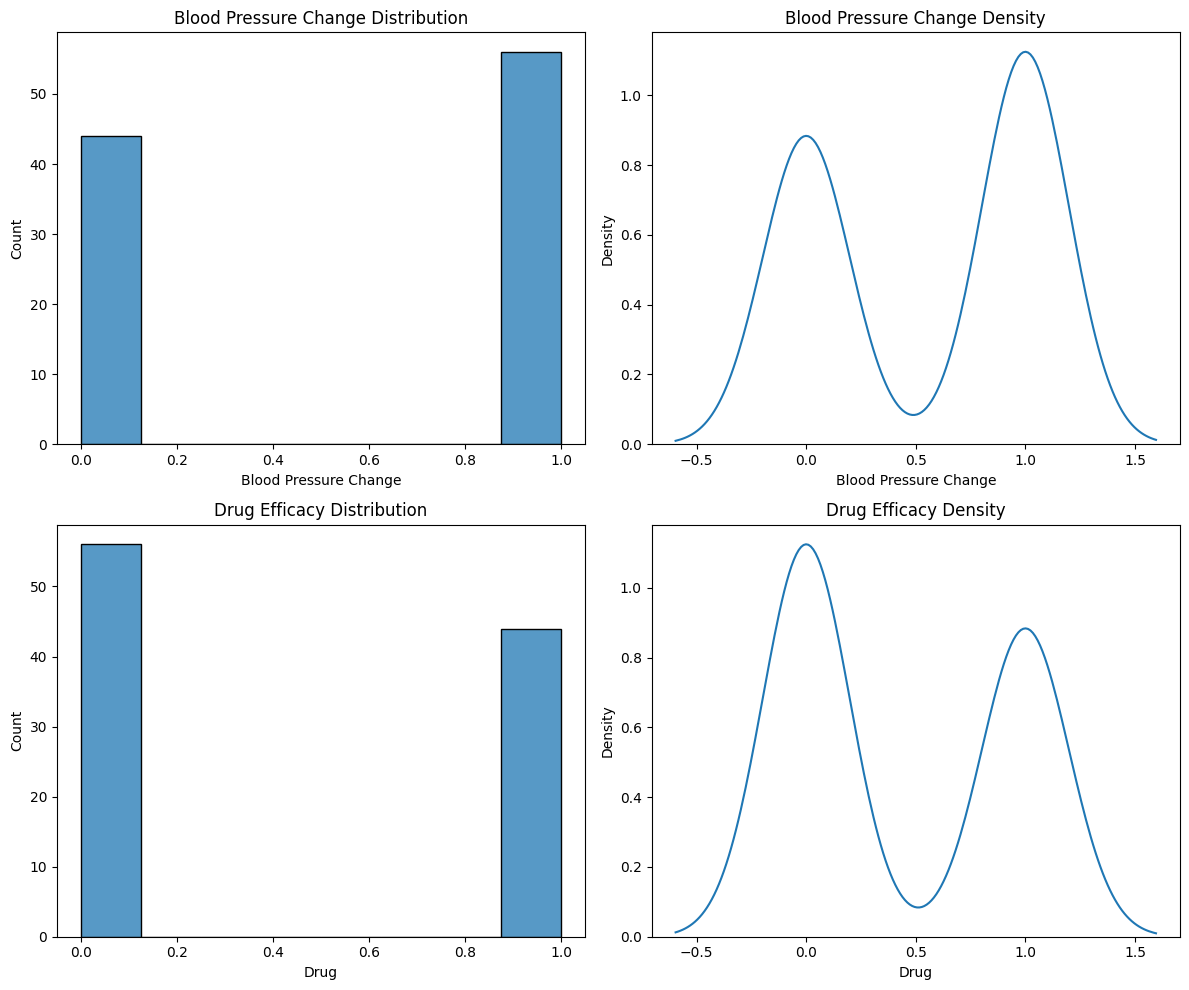

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1st and 2nd subplot: Drug Efficacy Histogram and density kde
sns.histplot(data=blood_pressure_data, x="Blood Pressure Change", ax=axes[0, 0] )
axes[0, 0].set_title("Blood Pressure Change Distribution")

sns.kdeplot(data=blood_pressure_data, x="Blood Pressure Change", ax=axes[0, 1])
axes[0, 1].set_title("Blood Pressure Change Density")

# 3rd and 4th subplot: Drug Efficacy Histogram and density kde
sns.histplot(data=efficacy_data, x="Drug", ax=axes[1, 0])
axes[1, 0].set_title("Drug Efficacy Distribution")

sns.kdeplot(data=efficacy_data, x="Drug", ax=axes[1, 1])
axes[1, 1].set_title("Drug Efficacy Density")
#axes[1, 1].set_title("Drug Efficacy Density")
#displot creates its own figure by default, why your original code wouldn't have used the subplot axes.
# Adjust layout
plt.tight_layout()
plt.show()

our belief here from the graph is that the patients that took the placebo were 56%, while real drug users were 44%.

We also saw a blood pressure change of about 56% and no change of about 44%

In [26]:
#P(A|B) = [P(B|A) × P(A)] / P(B); bayes theorem
p_bp_given_drug= pd.crosstab(blood_pressure_data['Blood Pressure Change'], 
                               efficacy_data['Drug'],
                               normalize='columns') #summing over columns to 1 to get the conditional probability
print(p_bp_given_drug)
print('P(Blood Pressure Change = 1 | Drug = 1): Probability of blood pressure change given active drug:, ', p_bp_given_drug.loc[1, 1])
print('P(Blood Pressure Change = 1 | Drug = 0): Probability of blood pressure change given placebo:, ', p_bp_given_drug.loc[1, 0])
print('P(Blood Pressure Change = 0 | Drug = 1): Probability of no blood pressure change given active drug:, ', p_bp_given_drug.loc[0, 1])
print('P(Blood Pressure Change = 0 | Drug = 0): Probability of no blood pressure change given placebo:, ', p_bp_given_drug.loc[0, 0])



Drug                          0         1
Blood Pressure Change                    
0                      0.446429  0.431818
1                      0.553571  0.568182
P(Blood Pressure Change = 1 | Drug = 1): Probability of blood pressure change given active drug:,  0.5681818181818182
P(Blood Pressure Change = 1 | Drug = 0): Probability of blood pressure change given placebo:,  0.5535714285714286
P(Blood Pressure Change = 0 | Drug = 1): Probability of no blood pressure change given active drug:,  0.4318181818181818
P(Blood Pressure Change = 0 | Drug = 0): Probability of no blood pressure change given placebo:,  0.44642857142857145


**#3 comments**

In pharmaceutical terms, We could say that the effect the placebo had on blood pressure change is almost identical to the effect of the drug on BP. This could mean the drug is probably ineffecttive or that the BP change happened due to chance.

### Exercise 4
**Understanding Correlation through Expected Values**

Let's use a dataset from the famous Iris flower dataset, which is available in the scikit-learn library. The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers. For this exercise, we'll focus on the correlation between sepal length and petal length.


**Instructions:**

4.1. **Data Retrieval:**
   - Load the Iris dataset from scikit-learn, focusing on the 'sepal length (cm)' and 'petal length (cm)' columns.


In [1]:
#4.1
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select 'sepal length (cm)' and 'petal length (cm)' columns
selected_columns = ['sepal length (cm)', 'petal length (cm)']
iris_data = iris_df[selected_columns]
iris_data.iloc[:10]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5



4.2. **Data Exploration:**
   - Display summary statistics to understand the distribution of sepal length and petal length.


In [7]:
#4.2
iris_data.describe()

,sepal length (cm),petal length (cm)
count,150.000000,150.000000
mean,5.843333,3.758000
std,0.828066,1.765298
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


4.3. **Expected Values:**
   - Define a function to calculate the expected values of sepal length (`E(X)`) and petal length (`E(Y)`). Display the results.


In [4]:
#4.3
import numpy as np
def expected_value(data):
    """
    Calculate the expected value of a dataset.
    Args:
        data (array-like): sum of Input data/ length of data
    Returns:
        float: Expected value of the data (mean)
    """
    mean_def= data.sum()/ len(data)
    return mean_def
print('Expected value of sepal length:', expected_value(iris_data['sepal length (cm)']))
print('Expected value of petal length:', expected_value(iris_data['petal length (cm)']))

Expected value of sepal length: 5.843333333333334
Expected value of petal length: 3.7580000000000005


4.4. **Covariance Calculation:**
   - Write a function to calculate the covariance between sepal length and petal length, using your computed expected values.


In [14]:
#4.4
def covariance_1(data1, data2):
    """
    Calculate the covariance between two datasets.
    Args:
        data1 (array-like): First dataset
        data2 (array-like): Second dataset
    Returns:
        float: Covariance between the two datasets
    """
    # Cov(X,Y) = E[(X - E[X])(Y - E[Y])] where E[X] and E[Y] are the mean/E of X and Y
    # Cov(X,Y) = sum((X - E[X])(Y - E[Y])) / (n - 1)
    # where n is the number of data points
    mean1 = expected_value(data1)
    mean2 = expected_value(data2)
    sum_product = np.sum((data1 - mean1) * (data2 - mean2))
    covariance_def = sum_product / (len(data1) - 1)  # Sample covariance
    return covariance_def
cov_sep_pet= covariance_1(iris_data['sepal length (cm)'], iris_data['petal length (cm)'])
print(f'Covariance between sepal length and petal length: {cov_sep_pet:.4f}')

Covariance between sepal length and petal length: 1.2743


4.5. **Correlation Calculation:**
   - Implement a function to calculate the correlation coefficient, using your covariance function. 


In [17]:
#4.5
mean1 = expected_value(iris_data['sepal length (cm)'])
mean2 = expected_value(iris_data['petal length (cm)'])
def correlation_1(data1, data2):
    """
    Calculate the correlation between two datasets.
    Args:
        data1 (array-like): First dataset
        data2 (array-like): Second dataset
    Returns:
        float: Correlation coefficient between the two datasets
    """
    covariance_value = covariance_1(data1, data2)
    #std_dev(X) = sqrt(sum((X - E[X])^2)) / (n - 1)
    std_dev1 = ((sum((data1-mean1)**2)) / ((len(data1) - 1)))**0.5 #(sum(data1-mean1))**0.5  # Sample standard deviation
    std_dev2 = ((sum((data2-mean2)**2)) / ((len(data2) - 1)))**0.5 #(sum(data2-mean2))**0.5  # Sample standard deviation
    # Correlation coefficient = Cov(X,Y) / (std_dev(X) * std_dev(Y))
    correlation_def = covariance_value / (std_dev1 * std_dev2)
    return correlation_def
corr_sep_pet = correlation_1(iris_data['sepal length (cm)'], iris_data['petal length (cm)'])
print(f'Correlation between sepal length and petal length: {corr_sep_pet:.4f}')

Correlation between sepal length and petal length: 0.8718


4.6. **Application:**
   - Print the calculated correlation coefficient and discuss the strength and direction of the correlation.

The correlation coefficient printed above reveals a quite a strong positive correlation between sepal length and petal length 

4.7. **Visualization:**
   - Create a scatter plot to visually represent the relationship between sepal length and petal length.


Correlation coefficient: 0.8718


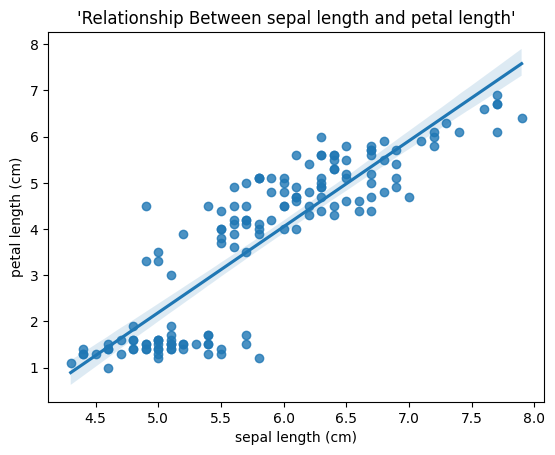

In [22]:
#4.7
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.regplot(x="sepal length (cm)", y="petal length (cm)", data=iris_data)
#! figure,id=scatter_plot_ex,width=3in,title="A seaborn regression/scatter plot"
plt.title("'Relationship Between sepal length and petal length'");
#plt.figure(figsize=(8, 6))
#plt.scatter(data=iris_data, x='sepal length (cm)', y='petal length (cm)')#,c= 'default'
#plt.title('Relationship Between sepal length and petal length')
#plt.ylabel('petal length')
#plt.xlabel('sepal length')
correlation = np.corrcoef(iris_data['sepal length (cm)'], iris_data['petal length (cm)'])[0, 1]
print(f'Correlation coefficient: {correlation:.4f}')


4.8. **Discussion:**
   - Interpret the results. How does the correlation coefficient align with the visual representation in the scatter plot? What insights can you derive regarding the relationship between sepal length and petal length in the Iris dataset?

**Answer 4.8 here.**

The regression line and the scatter points all align with the correlation coefficient that we got earlier, which is 0.8718. Sepal length and petal length seems to be dependent relationship

### Exercise 5

**Understanding Statistical Independence through Probability (Not using Chi2)**

**Scenario:**
In this exercise, we aim to assess whether sepal length and petal length are statistically independent for a subset of the Iris dataset.

Certainly, let's define the null hypothesis (\(H_0\)) and the alternative hypothesis (\(H_a\)) in the context of testing the independence of sepal length and petal length in the Iris dataset.

**Null Hypothesis (\(H_0\)):**
The null hypothesis states that there is no association or dependence between sepal length and petal length in the Iris dataset. Mathematically, this can be expressed as:

$$ H_0: \text{Sepal length and Petal length are independent.} $$

**Alternative Hypothesis (\(H_a\)):**
The alternative hypothesis asserts that there is a significant association or dependence between sepal length and petal length in the Iris dataset. Mathematically, this can be expressed as:

$$ H_a: \text{Sepal length and Petal length are not independent.} $$

In simpler terms, the null hypothesis assumes that any observed relationship between sepal length and petal length is due to random chance, while the alternative hypothesis suggests that there is a non-random association between these two variables.

Now, the goal is to conduct a statistical test based on these hypotheses to determine whether the evidence in the data supports rejecting the null hypothesis in favor of the alternative hypothesis. 

**Instructions:**

* 5.1 **Null Hypothesis:**
   - Restate the null hypothesis (\(H_0\)) and alternative hypothesis (\(H_a\)) regarding the independence of sepal length and petal length.

* 5.2 **Data Preparation:**
   - Extract the 'sepal length (cm)' and 'petal length (cm)' columns from the Iris dataset.


* 5.3 **Binning the Data:**
   - Create bins for both sepal length and petal length to discretize the continuous variables.


* 5.4 **Calculate Joint and Marginal Probabilities:**
   - Calculate the joint probability $$P(\text{sepal length} = x \cap \text{petal length} = y)$$ for each pair of bin edges.
   - Calculate the marginal probabilities $$P(\text{sepal length} = x)$$ and $$P(\text{petal length} = y)$$.


* 5.5 **Expected Probabilities under Independence:**
   - Under the assumption of independence, calculate the expected joint probabilities $$P(\text{sepal length} = x) \cdot P(\text{petal length} = y)$$ for each pair.


* 5.6 **Decision:**
   - Calculate the absolute values of the differences to compare the observed joint probabilities with the expected joint probabilities under independence . If they are close, then there is independence. If they are enough different, you would say that there is some dependence. Use this to determine whether to accept or reject the null hypothesis.



**5.1 provide your null and alternative hypotheses here.**

null hypotheses H_0: Their is no correlation between sepal length and petal length in dataset

alternative hypothesis: Their is a strong correlation between sepal length and petal length. correlation coefficient != 0 

   sepal length (cm)  petal length (cm)
0                5.1                1.4
1                4.9                1.4
2                4.7                1.3
3                4.6                1.5
4                5.0                1.4
5                5.4                1.7
6                4.6                1.4
7                5.0                1.5
8                4.4                1.4
9                4.9                1.5


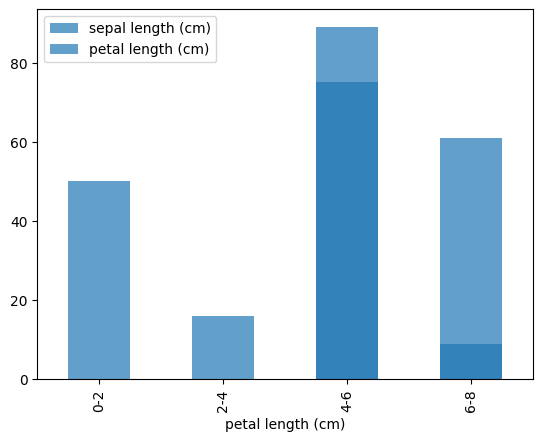

In [34]:
# 5.2
print(iris_data.iloc[:10])
iris_data1= iris_data.copy()
#5.3 
# Define bin edges
#Discretization is the process of converting continuous data into discrete values or categories
bins = [0, 2, 4, 6, 8] #matches data ranges
labels = ['0-2', '2-4', '4-6', '6-8']
# Create a new DataFrame with the binned data
iris_data1['sepal length (cm)'] = pd.cut(iris_data1['sepal length (cm)'], bins=bins, labels=labels)
iris_data1['petal length (cm)'] = pd.cut(iris_data1['petal length (cm)'], bins=bins, labels=labels)
# Plot histograms
iris_data1["sepal length (cm)"].value_counts().sort_index().plot(kind='bar', alpha=0.7)
iris_data1["petal length (cm)"].value_counts().sort_index().plot(kind='bar', alpha=0.7)
legend = ['sepal length (cm)', 'petal length (cm)']
plt.legend(legend)
plt.show()

In [62]:
# 5.4
#calculate the joint probability for bin edges
joint_prob = pd.crosstab(iris_data1['sepal length (cm)'], iris_data1['petal length (cm)'], normalize='all')
# Print the joint probability distribution
print('Joint Probability Distribution:')
print(joint_prob)

#marginal probability
marginal_prob_sepal = joint_prob.sum(axis=1)
marginal_prob_petal = joint_prob.sum(axis=0)
print('Marginal Probability Distribution of Sepal Length:')
print(marginal_prob_sepal)
print('Marginal Probability Distribution of Petal Length:')
print(marginal_prob_petal)

# 5.5
# 5.6
# Define a threshold for independence
epsilon = 0.01
independent = True
for i in range(len(marginal_prob_sepal)):
    for j in range(len(marginal_prob_petal)):
        # Calculate the joint probability
        joint_prob_value = joint_prob.iloc[i, j]
        # calculate expected joint probability P(X)*P(Y) with marginal probabilities
        expected_joint = marginal_prob_sepal[i] * marginal_prob_petal[j]
        # Check if the joint probability is close to the product of the marginals
        if abs(joint_prob_value - expected_joint) > epsilon:
            independent = False
            break
    if not independent:
        break
if independent:
    print('The two variables are independent.')
else:
    print('The two variables are not independent. There is some dependence between them.')
    print(abs(joint_prob_value - expected_joint))
# 5.7


Joint Probability Distribution:
petal length (cm)       0-2       2-4   4-6   6-8
sepal length (cm)                                
4-6                0.333333  0.100000  0.16  0.00
6-8                0.000000  0.006667  0.34  0.06
Marginal Probability Distribution of Sepal Length:
sepal length (cm)
4-6    0.593333
6-8    0.406667
dtype: float64
Marginal Probability Distribution of Petal Length:
petal length (cm)
0-2    0.333333
2-4    0.106667
4-6    0.500000
6-8    0.060000
dtype: float64
The two variables are not independent. There is some dependence between them.
0.13555555555555554


/var/folders/t7/qmgrjjzj7tz6f3016x6ts6s40000gn/T/ipykernel_58610/4154600516.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_joint = marginal_prob_sepal[i] * marginal_prob_petal[j]


The result derived above supports the alternative hypothesis, which states that there is a strong correlation betweem sepal length and petal length. Their association is not equal to 0>

### Exercise 6
**Gaussian Distribution**
Here we focuse on creating a 3D visualization of a multivariate Gaussian distribution using Python. In this example, we'll generate synthetic data for three variables: "X1," "X2," and "X3."

**Exercise: Multivariate Gaussian Distribution 3D Visualization with Python**

**Instructions:**

* 6.1 **Data Generation:**
   - Generate synthetic data for three variables, "X1," "X2," and "X3," assuming a multivariate Gaussian distribution.


* 6.2 **3D Visualization:**
   - Create a 3D scatter plot to visualize the multivariate Gaussian distribution. Over the scatter plot, graph the associated Gaussian distribution as in Figure 6.7 in the textbook.


* 6.3 **Discussion:**
   - Interpret the 3D scatter plot. What does the shape of the distribution suggest about the relationships between the variables? How do the mean vector and covariance matrix influence the spread and orientation of the distribution?


In [65]:
from IPython.core.interactiveshell import InteractiveShell
from matplotlib.gridspec import GridSpec
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10,10)
origin2D = np.vstack([0,0])
origin3D = np.vstack([0,0,0])
scale = 10


         X1        X2        X3
0 -0.290244 -0.659212 -0.287880
1 -1.539065 -1.363648 -0.825295
2 -1.523446 -0.935510 -1.581044
3 -0.717815 -0.543833  0.020417
4 -1.020734 -0.555333  1.403397
[[1.  0.8 0.5]
 [0.8 1.  0.3]
 [0.5 0.3 1. ]]


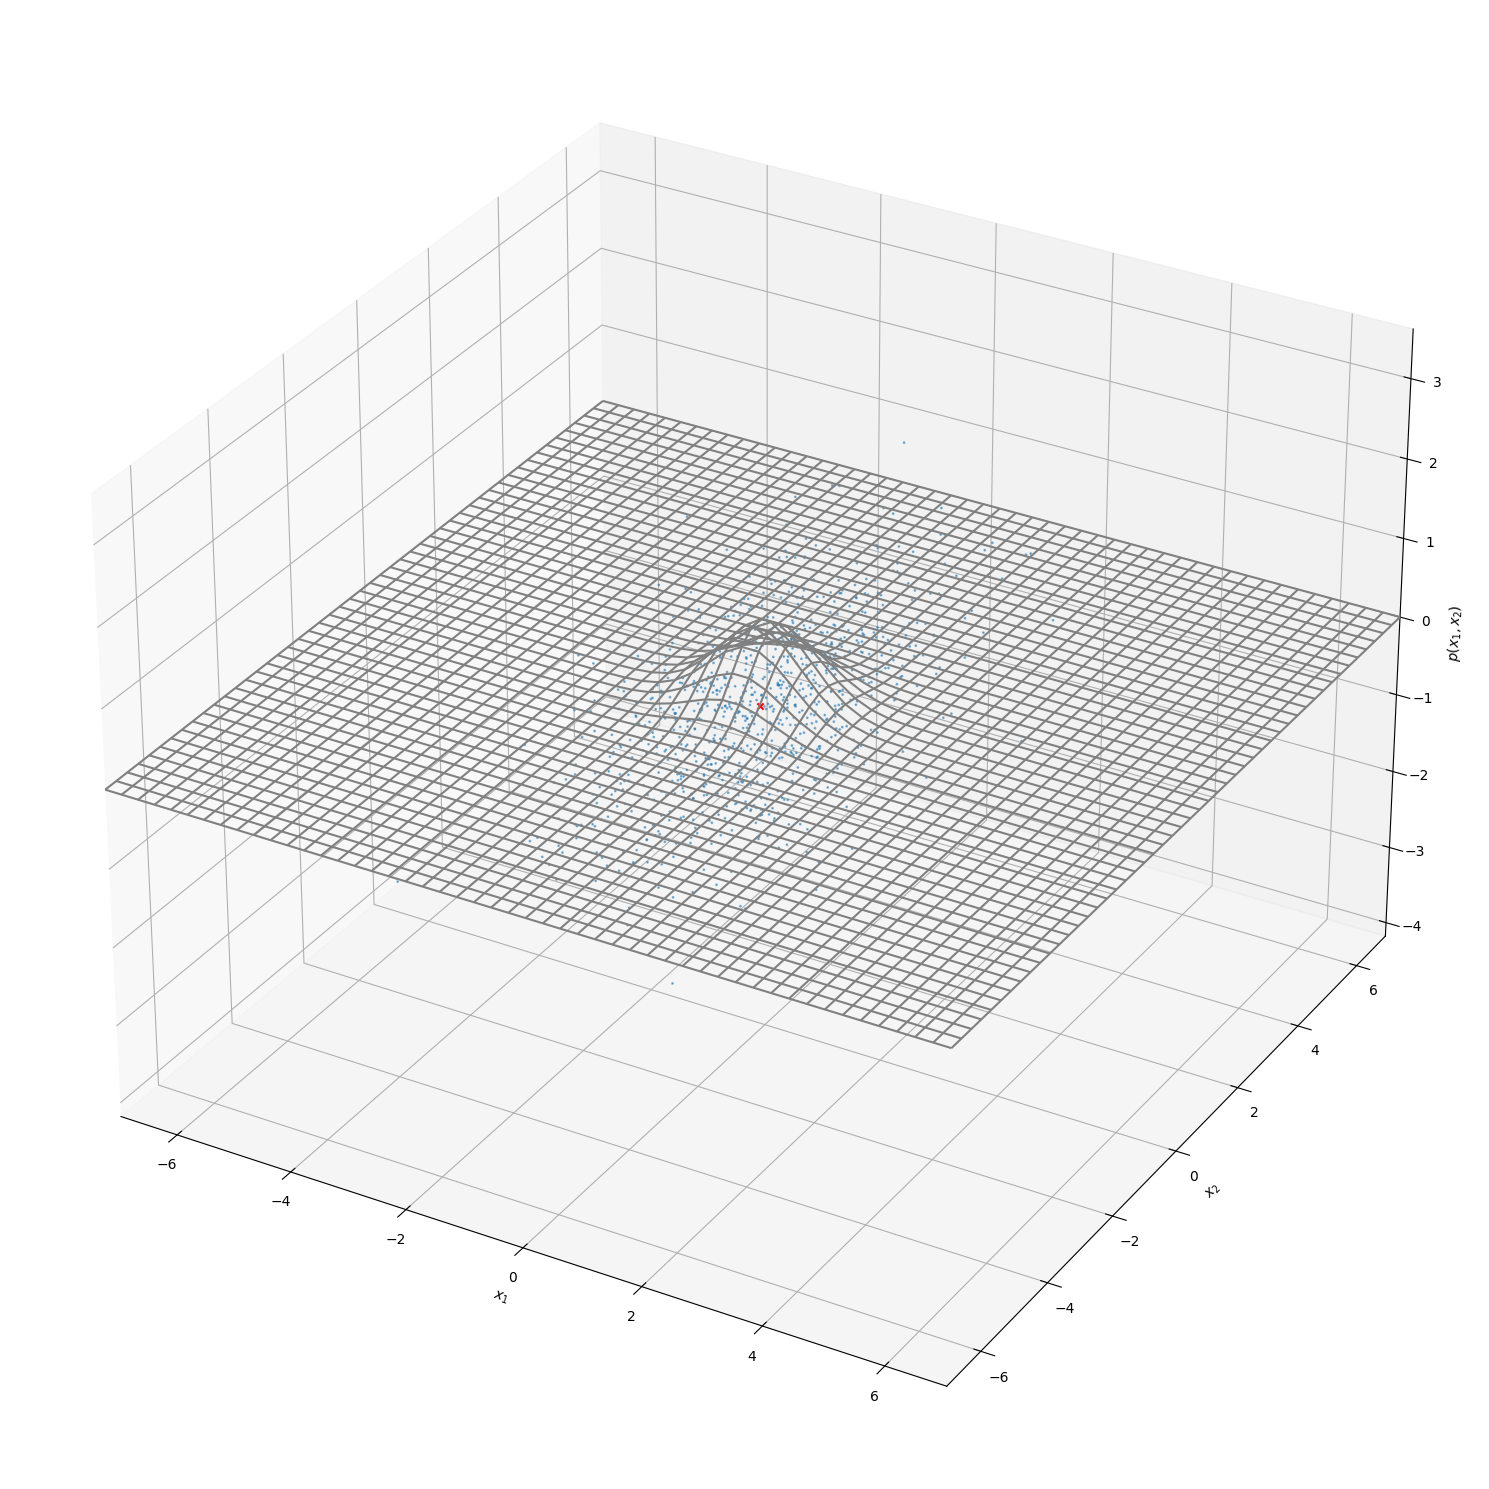

In [1]:
#6.1
import numpy as np
import pandas as pd
np.random.seed(42)
# Mean vector and covariance matrix
mean_vector = np.array([0, 0, 0])
cov_matrix = np.array([[1, 0.8, 0.5],
                      [0.8, 1, 0.3],
                      [0.5, 0.3, 1]])

# Generate synthetic data for variables X1, X2, and X3
num_samples = 1000
synthetic_data = np.random.multivariate_normal(mean_vector, cov_matrix, size=num_samples)
synthetic_data = pd.DataFrame(synthetic_data, columns=['X1', 'X2', 'X3'])
print(synthetic_data.iloc[:5])
print(cov_matrix)
#6.2 3D gaussian visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
scale3D = 7
# Figure setup.
fig = plt.figure(figsize = (15,16), tight_layout = True)
#gs = GridSpec(1, 2)
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
n = num_samples
# Define the grid for the wireframe
grid_range = np.linspace(-scale3D, scale3D, 50)
X, Y = np.meshgrid(grid_range, grid_range)
Z = np.exp(-(X**2 + Y**2))  # Example surface (Gaussian)

# Figure setup.

#ax.scatter(np.mean(synthetic_data[:,0]), np.mean(synthetic_data[:,1]),np.mean(synthetic_data[:,2]), marker = "x", c = "r") # Mean.
# Scatter and surface plot.
ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r"$x_1$"); ax.set_ylabel(r"$x_2$"); ax.set_zlabel(r"$p(x_1,x_2)$")
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
ax.scatter(synthetic_data.iloc[:n, 0],synthetic_data.iloc[:n, 1], #[:n][:,0] numpy style slicing
           synthetic_data.iloc[:n, 2], alpha = .5, s = 1)
ax.plot_wireframe(X,Y,Z, color = 'grey') ;  
ax.scatter(np.mean(synthetic_data.iloc[:,0]), np.mean(synthetic_data.iloc[:,1])
           ,np.mean(synthetic_data.iloc[:,2]), marker = "x", c = "r"); # Mean.


**Anwer 6.3 here.**

The shape of the distribution seems to capture some correlations within the variables, and this might be due to the data been synthetically generated with the mean vector and covariance matrix. this can cause the similarity between the variables, which is likely captured with the scatterplot.

### Exercise 7
**Marginal and Conditional Distributions with Multivariate Gaussian Data**

**Scenario:**
You are working with synthetic data representing three variables, "X1," "X2," and "X3," generated from a multivariate Gaussian distribution. The goal of this exercise is to test your understanding of marginal and conditional distributions.

**Instructions:**

* 7.1 **Data Preparation:**
   - Use the synthetic data generated for "X1," "X2," and "X3" in the previous exercise.

* 7.2 **Marginal Distributions:**
   - Calculate and visualize the marginal distributions for each variable separately.

* 7.3 **Conditional Distributions:**
   - Choose one variable (e.g., "X1") and calculate and visualize its conditional distribution given another variable (e.g., "X2"). You'll have to bin the data on one of the variables. You could condition it on X1 being in a certain range, for instance.

* 7.4 **Discussion:**
   - Interpret the marginal distributions. What insights can you gain from the distribution of each variable separately?
   - Analyze the conditional distribution. How does the distribution of "X1" change when conditioned on "X2"? What does this reveal about the relationship between these variables?


         X1        X2        X3
0 -0.290244 -0.659212 -0.287880
1 -1.539065 -1.363648 -0.825295
2 -1.523446 -0.935510 -1.581044
3 -0.717815 -0.543833  0.020417
4 -1.020734 -0.555333  1.403397


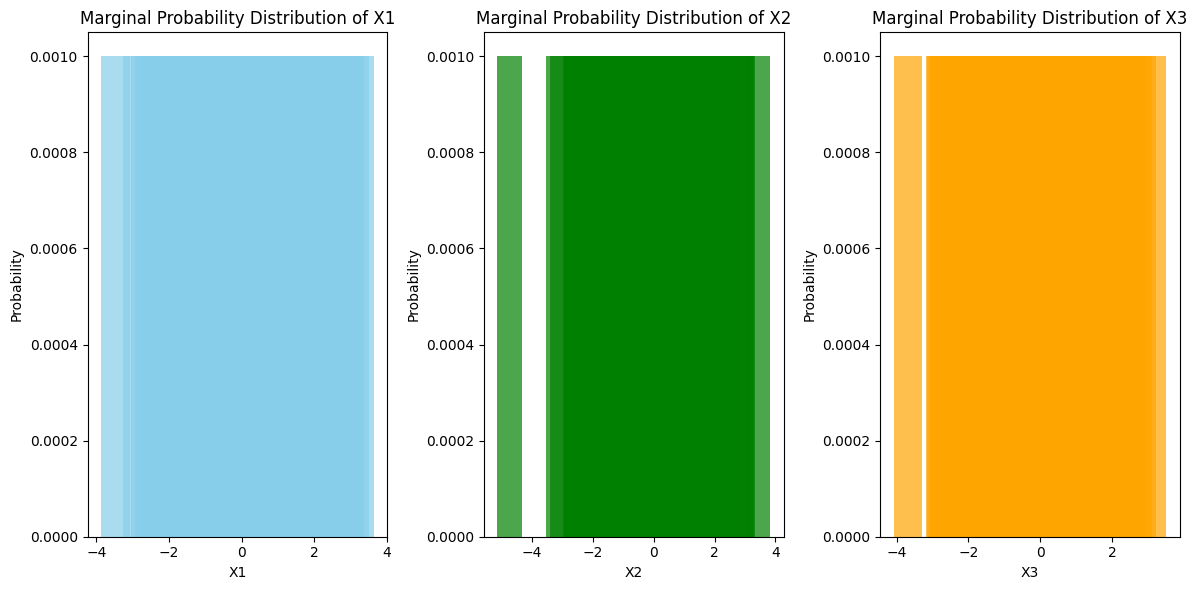

Conditional Probability Distribution of X1 given X2:
X2                -4.736961  -3.127659  -3.009493  -2.570946  -2.536770  \
X1                                                                        
(-3.473, -3.131]        1.0        0.0        0.0        0.0        0.0   
(-3.131, -2.795]        0.0        0.0        0.0        0.0        0.0   
(-2.795, -2.46]         0.0        0.0        0.0        0.0        0.0   
(-2.46, -2.125]         0.0        1.0        0.0        0.0        1.0   
(-2.125, -1.789]        0.0        0.0        1.0        1.0        0.0   
(-1.789, -1.454]        0.0        0.0        0.0        0.0        0.0   
(-1.454, -1.118]        0.0        0.0        0.0        0.0        0.0   
(-1.118, -0.783]        0.0        0.0        0.0        0.0        0.0   
(-0.783, -0.448]        0.0        0.0        0.0        0.0        0.0   
(-0.448, -0.112]        0.0        0.0        0.0        0.0        0.0   
(-0.112, 0.223]         0.0        0.0        0

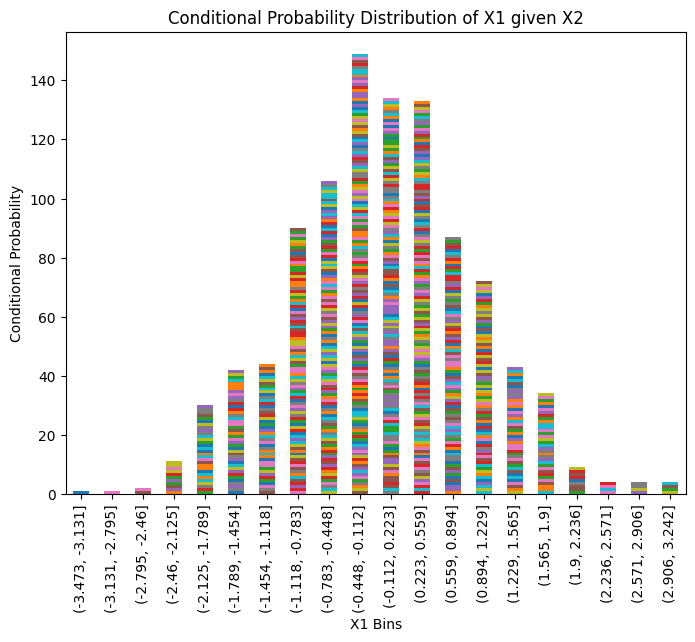

In [ ]:
#7.1
# Assuming 'synthetic_data' contains the generated data
print(synthetic_data.iloc[:5])
#x1 = synthetic_data[:, 0]
#x2 = synthetic_data[:, 1]
#x3 = synthetic_data[:, 2]

#7.2 marginal probability distribution
x1_marginal = synthetic_data['X1'].value_counts(normalize=True).sort_index()
x2_marginal = synthetic_data['X2'].value_counts(normalize=True).sort_index()
x3_marginal = synthetic_data['X3'].value_counts(normalize=True).sort_index()


fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12,6))
ax1.bar(x1_marginal.index, x1_marginal.values, color='skyblue', alpha=0.7)
ax1.set_xlabel('X1')
ax1.set_ylabel('Probability')
ax1.set_title('Marginal Probability Distribution of X1')

ax2.bar(x2_marginal.index, x2_marginal.values, color='green', alpha=0.7)
ax2.set_xlabel('X2')
ax2.set_ylabel('Probability')
ax2.set_title('Marginal Probability Distribution of X2')

ax3.bar(x3_marginal.index, x3_marginal.values, color='orange', alpha=0.7)
ax3.set_xlabel('X3')
ax3.set_ylabel('Probability')
ax3.set_title('Marginal Probability Distribution of X3')
plt.tight_layout()
plt.show();

#7.3
# Conditional distribution of X1 given X2
x1_bin = pd.cut(synthetic_data['X1'], bins=20)
x1_bin.value_counts()
# Calculate the conditional probability distribution
x1_given_x2 = pd.crosstab(x1_bin, synthetic_data['X2'], normalize='columns')
# Print the conditional probability distribution
print('Conditional Probability Distribution of X1 given X2:')
print(x1_given_x2.iloc[:, 1])  # Only show the distribution for X2 = 1
# Plotting the conditional probability distribution
fig, ax = plt.subplots(figsize=(8, 6))
x1_given_x2.plot(kind='bar', stacked=True, ax=ax, legend=False)
ax.set_xlabel('X1 Bins')
#ax.set_xticklabels(x1_given_x2.index.astype(str), rotation=45)
#ax.legend(title='X2', loc='upper right')
ax.set_ylabel('Conditional Probability')
ax.set_title('Conditional Probability Distribution of X1 given X2');



**Answer 7.4 here.**

**P.S= (The plot produced legends for the points oin X2, but it was too long. Also the right marginal and conditional probability density are below)**

All synthethic variables from the data are evenly distributed marginally according to the analysis from the histogram above. All variables are likely within the same range and an identical probability ratio; They are all also centered at 0 due to the mean of all variables set to 0.

The bar plot produced a plot that looks like a gaussian distribution, and this is probably not coincidental, the variables are strongly correlated, if not all values of X2 would have roughly the same distribution like the marginal distribution we got earlier. The distribution of the probability changes by a factor of 1 amongs X1 bins response to the X2 columns. knowing X2 gives you significant information about the likely values of X1.

In [2]:
#6.1
import numpy as np
import pandas as pd
np.random.seed(42)
# Mean vector and covariance matrix
mean_vector = np.array([0, 0, 0])
cov_matrix = np.array([[1, 0.8, 0.5],
                      [0.8, 1, 0.3],
                      [0.5, 0.3, 1]])

# Generate synthetic data for variables X1, X2, and X3
num_samples = 1000
synthetic_data = np.random.multivariate_normal(mean_vector, cov_matrix, size=num_samples)
synthetic_data = pd.DataFrame(synthetic_data, columns=['X1', 'X2', 'X3'])
print(synthetic_data.iloc[:5])
print(cov_matrix)

         X1        X2        X3
0 -0.290244 -0.659212 -0.287880
1 -1.539065 -1.363648 -0.825295
2 -1.523446 -0.935510 -1.581044
3 -0.717815 -0.543833  0.020417
4 -1.020734 -0.555333  1.403397
[[1.  0.8 0.5]
 [0.8 1.  0.3]
 [0.5 0.3 1. ]]


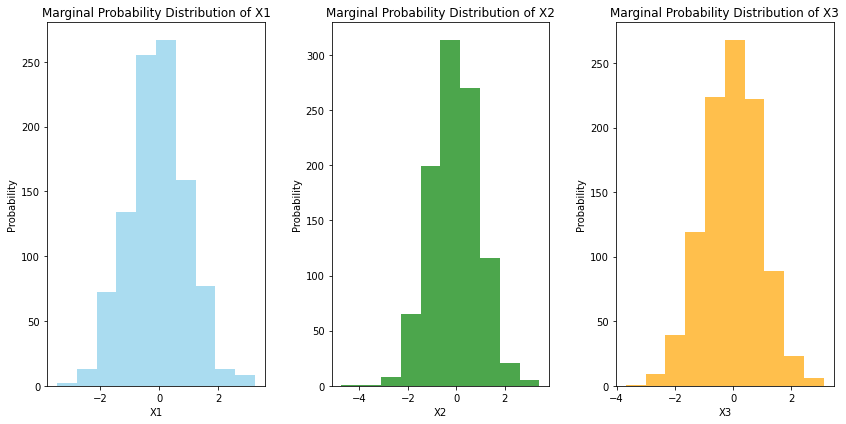

In [8]:
#7.2 marginal probability distribution
import matplotlib.pyplot as plt
x1_marginal = synthetic_data['X1'].value_counts(normalize=True).sort_index()
x2_marginal = synthetic_data['X2'].value_counts(normalize=True).sort_index()
x3_marginal = synthetic_data['X3'].value_counts(normalize=True).sort_index()


fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12,6))
ax1.hist(x1_marginal.index, color='skyblue', alpha=0.7)
ax1.set_xlabel('X1')
ax1.set_ylabel('Probability')
ax1.set_title('Marginal Probability Distribution of X1')

ax2.hist(x2_marginal.index, color='green', alpha=0.7)
ax2.set_xlabel('X2')
ax2.set_ylabel('Probability')
ax2.set_title('Marginal Probability Distribution of X2')

ax3.hist(x3_marginal.index, color='orange', alpha=0.7)
ax3.set_xlabel('X3')
ax3.set_ylabel('Probability')
ax3.set_title('Marginal Probability Distribution of X3')
plt.tight_layout()
plt.show();

No handles with labels found to put in legend.


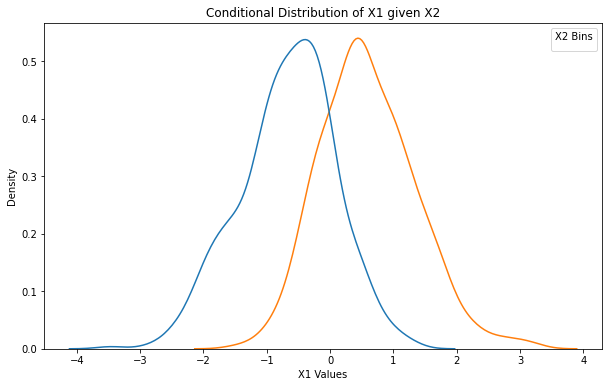

In [12]:
# Create X2 bins to condition on
x2_bins = pd.qcut(synthetic_data['X2'], q=2) #halfs instead of quartiles
synthetic_data['X2_bin'] = x2_bins

# Plot conditional distributions of X1 given different X2 bins
plt.figure(figsize=(10, 6))
sns.kdeplot(data=synthetic_data, x='X1', hue='X2_bin', common_norm=False)
plt.title('Conditional Distribution of X1 given X2')
plt.xlabel('X1 Values')
plt.ylabel('Density')
plt.legend(title='X2 Bins');

* The shift in the mean of X1 as X2 increases demonstrates the positive correlation (0.8) between them
* The density curves for X1 will have different means based on X2 bins
* For the lowest X2 bin, the X1 distribution will be centered on negative values, For the highest X2 bin, the X1 distribution will be centered on positive values
* This visualization reveals that X1 and X2 have a strong positive relationship - as one increases, the other tends to increase as well.

In [13]:
x2_bins

0      (-4.738, -0.0508]
1      (-4.738, -0.0508]
2      (-4.738, -0.0508]
3      (-4.738, -0.0508]
4      (-4.738, -0.0508]
             ...        
995     (-0.0508, 3.428]
996     (-0.0508, 3.428]
997    (-4.738, -0.0508]
998     (-0.0508, 3.428]
999     (-0.0508, 3.428]
Name: X2, Length: 1000, dtype: category
Categories (2, interval[float64]): [(-4.738, -0.0508] < (-0.0508, 3.428]]

In [15]:
synthetic_data.iloc[:5]

,X1,X2,X3,X2_bin
0,-0.290244,-0.659212,-0.287880,"(-4.738, -0.0508]"
1,-1.539065,-1.363648,-0.825295,"(-4.738, -0.0508]"
2,-1.523446,-0.935510,-1.581044,"(-4.738, -0.0508]"
3,-0.717815,-0.543833,0.020417,"(-4.738, -0.0508]"
4,-1.020734,-0.555333,1.403397,"(-4.738, -0.0508]"
